In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
ibm = pd.read_excel("IBM Employee Attrition.xlsx")

In [4]:
pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

In [5]:
ibm.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [6]:
ibm.drop(columns = "EmployeeNumber", inplace = True)

In [7]:
ibm.drop(columns = "Over18", inplace = True)

In [8]:
# Check for Outliers
# change Education job satisfaction, job involvement work life balance performance rating 
# to qual
# check for missing data 


# No monthly income outliers
#14 manager outliers with 15+ years with manager no attrition 
# lots of outliers on years without a promotion (12+ years) handful have left 
# 13 outliers for years in current role
# 25 outliers in years at company 
# no outliers in training last year
# 16 outliers in years worked 
# no outliers in salary hikes
# no outliers in age 


# 42 year difference between employees
# 28 mile difference between distances
# 18,990 difference between monthly incomes 
# 14 percent difference in salary hikes
# 38 year difference in total working years  

# higher attrition in lower ages and lower job level
# higher attrition at 0 stock options but 2nd plces is 3 stock options 
# higher attrition for those who can work overtime 
# higher attrtion for those who have fewer total working years
# higher attrition for less years at company however highest is 32 years at company


# CONCLUSIONS: Employees who start to dedicate more time and years to the job should 
# have better compansations through stock options or not having to possibly work overtime 


In [9]:
ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
ibm["Education"].replace([1,2,3,4,5], ["Below College", "College","Bachelor","Masters","Doctoral"], inplace = True)

In [11]:
ibm["JobSatisfaction"].replace([1,2,3,4], ["Low", "Medium","High","Very High"], inplace = True)

In [12]:
ibm["JobInvolvement"].replace([1,2,3,4], ["Low", "Medium","High","Very High"], inplace = True)

In [13]:
ibm["WorkLifeBalance"].replace([1,2,3,4], ["Bad", "Good","Better","Best"], inplace = True)

In [14]:
ibm["PerformanceRating"].replace([1,2,3,4], ["Low", "Good","Excellent","Outstanding"], inplace = True)

In [15]:
ibm["RelationshipSatisfaction"].replace([1,2,3,4], ["Low", "Medium","High","Very High"], inplace = True)

In [54]:
ibmz["Attrition"].replace(["Yes","No"], [1,0], inplace = True)


In [55]:
ibmz["OverTime"].replace(["Yes","No"], [1,0], inplace = True)

In [56]:
ibmz["StockOptionLevel"].value_counts()

0    609
1    573
2    155
3     82
Name: StockOptionLevel, dtype: int64

In [19]:
ibmz = ibm.copy()

In [20]:
ibmz["zscore_Income"] = np.abs(stats.zscore(ibmz["MonthlyIncome"]))

In [21]:
z_outliers = ibmz.loc[ibmz["zscore_Income"] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [22]:
ibmz["zscore_Manager"] = np.abs(stats.zscore(ibmz["YearsWithCurrManager"]))

In [23]:
z_outliersman = ibmz.loc[ibmz["zscore_Manager"] > 3].index
print(z_outliersman)

Int64Index([28, 123, 153, 187, 231, 386, 561, 616, 635, 686, 875, 926, 1078,
            1348],
           dtype='int64')


In [24]:
ibmz.drop(z_outliersman, inplace = True)

In [25]:
ibmz["zscore_Promo"] = np.abs(stats.zscore(ibmz["YearsSinceLastPromotion"]))

In [26]:
z_outlierspro = ibmz.loc[ibmz["zscore_Promo"] > 3].index
print(z_outlierspro)

Int64Index([  45,   62,   64,  110,  126,  178,  218,  237,  326,  425,  427,
             535,  584,  595,  653,  701,  752,  799,  838,  861,  914,  922,
             937,  976, 1008, 1086, 1093, 1138, 1156, 1221, 1223, 1242, 1295,
            1301, 1303, 1331, 1414],
           dtype='int64')


In [27]:
ibmz.drop(z_outlierspro, inplace = True)

In [28]:
ibmz["zscore_Currole"] = np.abs(stats.zscore(ibmz["YearsInCurrentRole"]))

In [29]:
z_outliersrole = ibmz.loc[ibmz["zscore_Currole"] > 3].index
print(z_outliersrole)

Int64Index([63, 190, 281, 417, 466, 716, 746, 1024, 1150, 1327, 1351, 1430], dtype='int64')


In [30]:
ibmz["zscore_at"] = np.abs(stats.zscore(ibmz["YearsAtCompany"]))

In [31]:
z_outliersat = ibmz.loc[ibmz["zscore_at"] > 3].index
print(z_outliersat)

Int64Index([  18,   98,  119,  190,  244,  270,  311,  390,  411,  473,  477,
             592,  677,  749,  913,  918,  962, 1111, 1116, 1135],
           dtype='int64')


In [32]:
ibmz["zscore_train"] = np.abs(stats.zscore(ibmz["TrainingTimesLastYear"]))

In [33]:
z_outlierstrain = ibmz.loc[ibmz["zscore_train"] > 3].index
print(z_outlierstrain)

Int64Index([], dtype='int64')


In [34]:
ibmz["zscore_work"] = np.abs(stats.zscore(ibmz["TotalWorkingYears"]))

In [35]:
z_outlierswork = ibmz.loc[ibmz["zscore_work"] > 3].index
print(z_outlierswork)

Int64Index([  85,   98,  190,  270,  401,  411,  445,  624,  649,  749,  890,
             894,  956,  962, 1043, 1111, 1116, 1184, 1264, 1401],
           dtype='int64')


In [36]:
ibmz["zscore_sal"] = np.abs(stats.zscore(ibmz["PercentSalaryHike"]))

In [37]:
z_outlierssal = ibmz.loc[ibmz["zscore_sal"] > 3].index
print(z_outlierssal)

Int64Index([], dtype='int64')


In [38]:
ibmz["zscore_workwith"] = np.abs(stats.zscore(ibmz["NumCompaniesWorked"]))

In [39]:
ibmz["StockOptionLevel"].value_counts()

0    609
1    573
2    155
3     82
Name: StockOptionLevel, dtype: int64

In [40]:
z_outliersworkwith = ibmz.loc[ibmz["zscore_workwith"] > 3].index
print(z_outliersworkwith)

Int64Index([], dtype='int64')


In [41]:
ibmz["zscore_age"] = np.abs(stats.zscore(ibmz["Age"]))

In [42]:
z_outliersage = ibmz.loc[ibmz["zscore_age"] > 3].index
print(z_outliersage)

Int64Index([], dtype='int64')


In [43]:
ibmz["Age"].max() - ibmz["Age"].min()

42

In [44]:
ibmz["DistanceFromHome"].max() - ibmz["DistanceFromHome"].min()

28

In [45]:
ibmz["MonthlyIncome"].max() - ibmz["MonthlyIncome"].min()

18990

In [46]:
ibmz["PercentSalaryHike"].max() - ibmz["PercentSalaryHike"].min()

14

In [47]:
ibmz["TotalWorkingYears"].max() - ibmz["TotalWorkingYears"].min()

38

In [48]:
ibmz["YearsAtCompany"].max() - ibmz["YearsAtCompany"].min()

37

In [49]:
ibmz["YearsSinceLastPromotion"].max() - ibmz["YearsSinceLastPromotion"].min()

11

In [50]:
ibmz["YearsWithCurrManager"].max() - ibmz["YearsWithCurrManager"].min()

14

In [51]:
ibmz.corr()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_Income,zscore_Manager,zscore_Promo,zscore_Currole,zscore_at,zscore_train,zscore_work,zscore_sal,zscore_workwith,zscore_age
Age,1.000000,-0.009230,0.010508,0.488778,0.478085,0.301679,0.004935,0.048131,0.663249,-0.013798,0.248594,0.167406,0.133510,0.158651,0.277976,0.066256,0.082022,0.091964,0.169913,-0.037735,0.298873,-0.018143,0.006009,0.258928
DistanceFromHome,-0.009230,1.000000,-0.018513,0.006476,-0.015573,-0.023914,0.041385,0.048890,-0.002865,-0.034233,0.000063,0.013539,-0.001755,-0.001945,-0.052353,0.013779,-0.001921,-0.017898,-0.025748,-0.012988,-0.046150,0.021667,-0.044260,-0.007188
EnvironmentSatisfaction,0.010508,-0.018513,1.000000,0.007863,-0.001095,0.010527,-0.029573,0.008361,-0.005690,-0.019357,-0.002583,0.016779,0.015215,-0.002006,0.015468,-0.028951,-0.005828,0.004431,-0.034515,-0.039396,0.030484,-0.023252,0.024212,0.009103
JobLevel,0.488778,0.006476,0.007863,1.000000,0.945867,0.145418,-0.022837,0.019012,0.771136,-0.010077,0.479515,0.348186,0.247727,0.340866,0.550167,0.216228,0.187622,0.235998,0.342969,-0.013270,0.413869,0.003557,-0.019515,0.116436
MonthlyIncome,0.478085,-0.015573,-0.001095,0.945867,1.000000,0.155443,-0.013038,0.009416,0.761695,-0.014264,0.451599,0.319655,0.230601,0.303736,0.651442,0.197617,0.165794,0.217676,0.340125,-0.008568,0.461050,0.015831,-0.014975,0.136789
NumCompaniesWorked,0.301679,-0.023914,0.010527,0.145418,0.155443,1.000000,-0.009414,0.037715,0.249907,-0.071732,-0.142090,-0.108921,-0.052502,-0.126995,0.046230,-0.040723,-0.044111,-0.053173,-0.043502,-0.026585,0.028794,-0.048357,0.614968,0.034036
PercentSalaryHike,0.004935,0.041385,-0.029573,-0.022837,-0.013038,-0.009414,1.000000,0.006192,-0.014339,-0.002323,-0.026666,-0.005794,-0.024408,-0.006635,0.009242,0.015175,-0.001267,0.017675,0.008265,-0.008357,-0.012637,0.501559,-0.005843,0.011194
StockOptionLevel,0.048131,0.048890,0.008361,0.019012,0.009416,0.037715,0.006192,1.000000,0.020310,0.012382,0.026333,0.061996,0.020304,0.044881,-0.025737,-0.017444,0.010546,0.033655,-0.032054,-0.012968,-0.043164,-0.004454,0.013848,-0.047633
TotalWorkingYears,0.663249,-0.002865,-0.005690,0.771136,0.761695,0.249907,-0.014339,0.020310,1.000000,-0.022807,0.556093,0.411426,0.277303,0.410227,0.490219,0.222541,0.202088,0.268107,0.382220,-0.030611,0.533796,0.017862,-0.017686,0.178523
TrainingTimesLastYear,-0.013798,-0.034233,-0.019357,-0.010077,-0.014264,-0.071732,-0.002323,0.012382,-0.022807,1.000000,0.020367,0.007672,0.028188,0.009643,0.010970,0.042252,0.025216,0.016905,0.031107,0.281227,-0.033381,0.011688,-0.066099,0.010972


In [57]:
ibmz["Attrition"].groupby(ibmz["Age"]).mean()

Age
18    0.500000
19    0.666667
20    0.545455
21    0.461538
22    0.312500
23    0.285714
24    0.269231
25    0.230769
26    0.307692
27    0.062500
28    0.291667
29    0.264706
30    0.150000
31    0.260870
32    0.180328
33    0.206897
34    0.116883
35    0.129870
36    0.074627
37    0.122449
38    0.034483
39    0.150000
40    0.092593
41    0.138889
42    0.024390
43    0.064516
44    0.206897
45    0.052632
46    0.129032
47    0.095238
48    0.111111
49    0.083333
50    0.200000
51    0.125000
52    0.187500
53    0.111111
54    0.000000
55    0.150000
56    0.230769
57    0.000000
58    0.272727
59    0.000000
60    0.000000
Name: Attrition, dtype: float64

In [58]:
ibmz["Attrition"].groupby(ibmz["JobLevel"]).mean()

JobLevel
1    0.262963
2    0.097744
3    0.152709
4    0.034091
5    0.053571
Name: Attrition, dtype: float64

In [59]:
ibmz["Attrition"].groupby(ibmz["StockOptionLevel"]).mean()

StockOptionLevel
0    0.244663
1    0.095986
2    0.077419
3    0.182927
Name: Attrition, dtype: float64

In [60]:
ibmz["Attrition"].groupby(ibmz["OverTime"]).mean()

OverTime
0    0.104228
1    0.310945
Name: Attrition, dtype: float64

In [61]:
ibmz["Attrition"].groupby(ibmz["TotalWorkingYears"]).mean()

TotalWorkingYears
0     0.454545
1     0.493827
2     0.290323
3     0.214286
4     0.190476
5     0.181818
6     0.176000
7     0.222222
8     0.155340
9     0.104167
10    0.123762
11    0.194444
12    0.104167
13    0.083333
14    0.129032
15    0.125000
16    0.081081
17    0.096774
18    0.125000
19    0.136364
20    0.074074
21    0.032258
22    0.062500
23    0.071429
24    0.230769
25    0.000000
26    0.076923
27    0.000000
28    0.090909
29    0.000000
30    0.000000
31    0.125000
32    0.000000
33    0.200000
34    0.333333
35    0.000000
36    0.000000
37    0.000000
38    0.000000
Name: Attrition, dtype: float64

In [62]:
ibmz["Attrition"].groupby(ibmz["YearsAtCompany"]).mean()

YearsAtCompany
0     0.363636
1     0.345029
2     0.212598
3     0.156250
4     0.172727
5     0.107143
6     0.118421
7     0.122222
8     0.112500
9     0.097561
10    0.150000
11    0.062500
12    0.000000
13    0.086957
14    0.111111
15    0.050000
16    0.090909
17    0.000000
18    0.111111
19    0.142857
20    0.047619
21    0.000000
22    0.000000
24    0.333333
25    0.000000
26    0.000000
29    0.000000
31    0.000000
32    0.500000
33    0.333333
36    0.000000
37    0.000000
Name: Attrition, dtype: float64

In [63]:
ibmz["Attrition"].groupby(ibmz["YearsInCurrentRole"]).mean()

YearsInCurrentRole
0     0.299180
1     0.192982
2     0.182796
3     0.119403
4     0.144231
5     0.000000
6     0.068966
7     0.144186
8     0.081395
9     0.083333
10    0.038462
11    0.000000
12    0.111111
13    0.000000
14    0.142857
15    0.000000
16    0.000000
17    0.000000
18    0.000000
Name: Attrition, dtype: float64

In [69]:
ibmz.drop(columns = "zscore_Income", inplace = True)

In [70]:
ibmz.drop(columns = "zscore_Manager", inplace = True)

In [71]:
ibmz.drop(columns = "zscore_Currole", inplace = True)

In [72]:
ibmz.drop(columns = "zscore_Promo", inplace = True)

In [73]:
ibmz.drop(columns = "zscore_at", inplace = True)

In [74]:
ibmz.drop(columns = "zscore_train", inplace = True)

In [75]:
ibmz.drop(columns = "zscore_work", inplace = True)

In [76]:
ibmz.drop(columns = "zscore_sal", inplace = True)

In [77]:
ibmz.drop(columns = "zscore_workwith", inplace = True)

In [78]:
ibmz.drop(columns = "zscore_age", inplace = True)

In [79]:
result = sm.ols('Attrition ~ Age +  OverTime + StockOptionLevel + YearsAtCompany', data = ibmz).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     48.00
Date:                Thu, 04 May 2023   Prob (F-statistic):           6.88e-38
Time:                        21:25:42   Log-Likelihood:                -509.12
No. Observations:                1419   AIC:                             1028.
Df Residuals:                    1414   BIC:                             1055.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3990      0.039     10.139      0.000       0.322       0.476
Age                 -0.0056      0.001     -5.279      0.000      -0.008      -0.003
OverTime             0.2081      0.020     10.171      0.000       0.168       0.248
StockOptionLevel    -0.0538      0.011     -4.979      0.000      -0.075      -0.033
YearsAtCompany      -0.0075      0.002     -4.262      0.000      -0.011      -0.004
==============================================================================
Omnibus:                      355.857   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.769
Skew:                           1.559   Prob(JB):                    8.13e-147
Kurtosis:                       4.287   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
result.predict({
    'Age': 29, 
    'YearsAtCompany': 5, 
    'OverTime': 0, 
    'StockOptionLevel': 2})

0    0.092169
dtype: float64

In [118]:
result.predict({
    'Age': 29, 
    'YearsAtCompany': 5, 
    'OverTime': 1, 
    'StockOptionLevel': 0})

0    0.407945
dtype: float64

In [119]:
result.predict({
    'Age': 40, 
    'YearsAtCompany': 17, 
    'OverTime': 0, 
    'StockOptionLevel': 1})

0   -0.005731
dtype: float64

In [120]:
result.predict({
    'Age': 40, 
    'YearsAtCompany': 17, 
    'OverTime': 1, 
    'StockOptionLevel': 1})

0    0.202369
dtype: float64

In [121]:
result.predict({
    'Age': 45, 
    'YearsAtCompany': 23, 
    'OverTime': 1, 
    'StockOptionLevel': 3})

0    0.021607
dtype: float64

In [122]:
result.predict({
    'Age': 45, 
    'YearsAtCompany': 23, 
    'OverTime': 0, 
    'StockOptionLevel': 3})

0   -0.186493
dtype: float64

<AxesSubplot:xlabel='OverTime', ylabel='Attrition'>

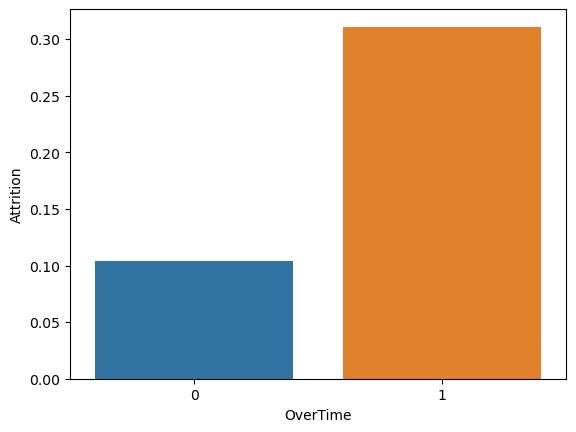

In [80]:
sns.barplot(data = ibmz, x = "OverTime", y = "Attrition", ci = None)

<Figure size 4500x600 with 0 Axes>

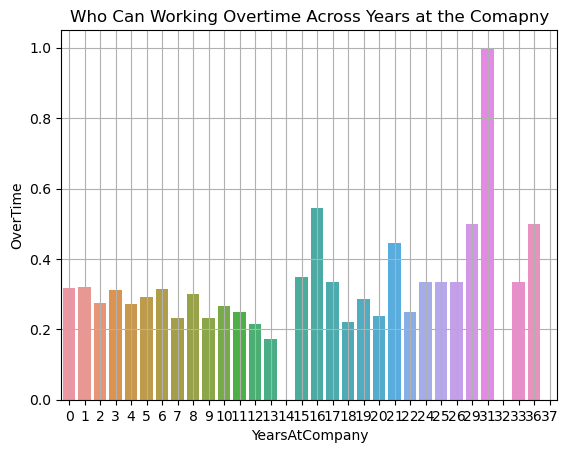

<Figure size 4500x600 with 0 Axes>

In [112]:
sns.barplot(data = ibmz, x = "YearsAtCompany", y = "OverTime", ci = None)

plt.title('Who Can Working Overtime Across Years at the Comapny')
plt.grid()
plt.figure(figsize = (45,6))
## plt.minorticks_on() 

Text(0.5, 1.0, 'Stock Options Across Years at Company')

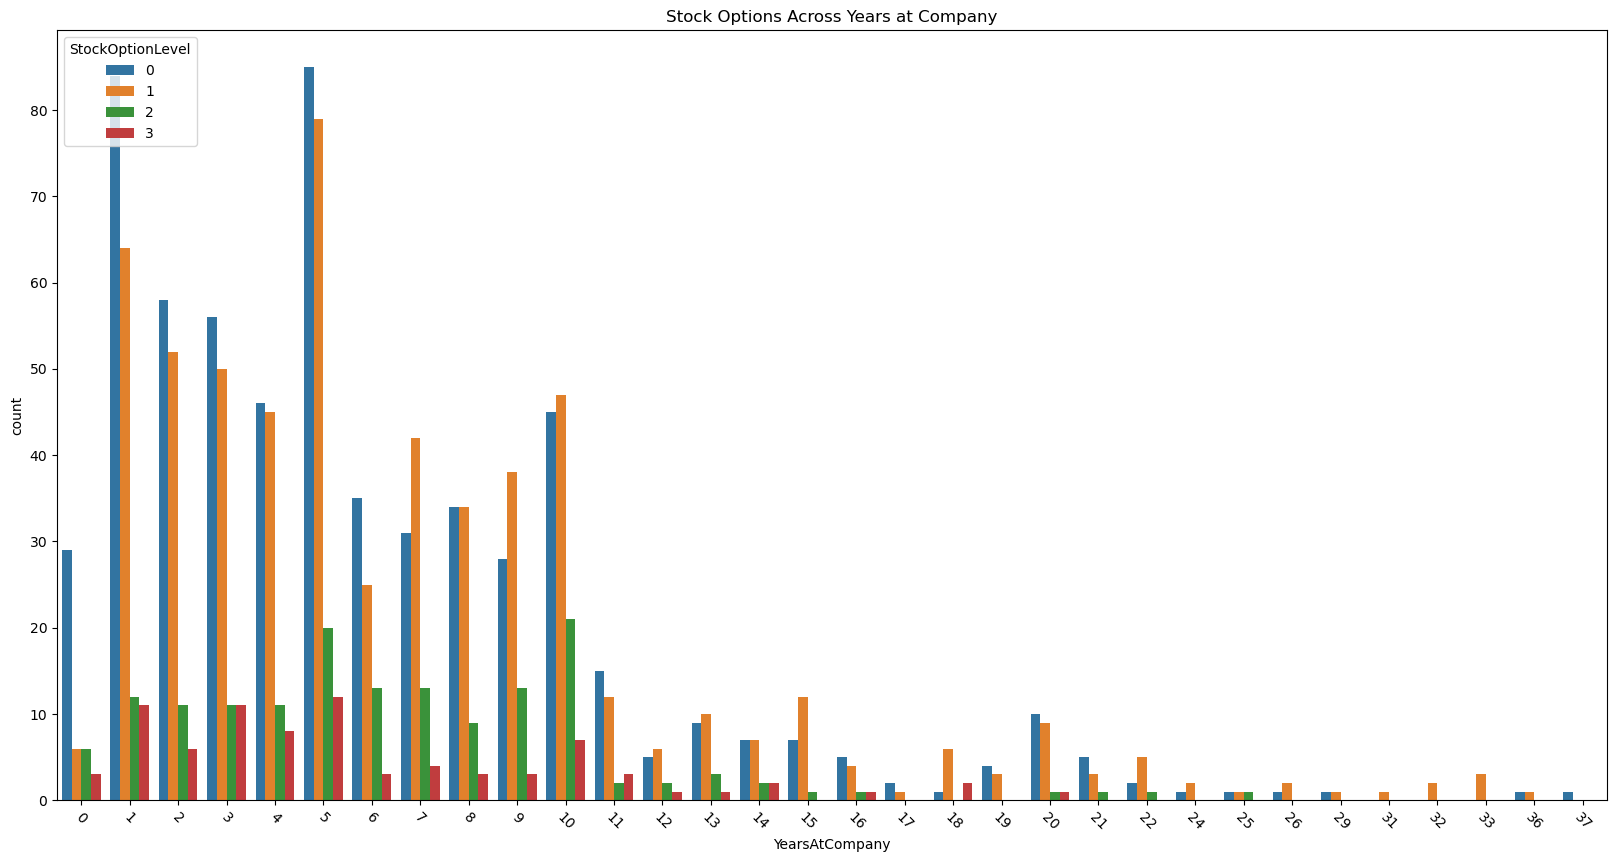

In [114]:
plt.figure(figsize=(20,10))

sns.countplot(data = ibmz, x = "YearsAtCompany", hue = "StockOptionLevel")

plt.xticks(rotation = -45)
plt.title('Stock Options Across Years at Company')